In [ ]:
import pandas as pd
import scipy as sc
import sympy as sp
import numpy as np
import h5py
import matplotlib.pylab as plt

In [ ]:
#Datasets
data_train= "/content/train_catvnoncat.h5"
train_dataset = h5py.File(data_train, "r")

data_test= "/content/test_catvnoncat.h5"
test_dataset = h5py.File(data_test, "r")

In [ ]:
#Identificación de la estructura de los datos
train_dataset.keys()

<KeysViewHDF5 ['list_classes', 'train_set_x', 'train_set_y']>

In [ ]:
# Obtención de la data
xtrain_classes, xtrain, train_label =\
train_dataset["list_classes"],train_dataset["train_set_x"],train_dataset["train_set_y"]

test_classes, xtest,test_label =\
test_dataset["list_classes"],test_dataset["test_set_x"],test_dataset["test_set_y"]

In [ ]:
np.shape(xtrain)

(209, 64, 64, 3)

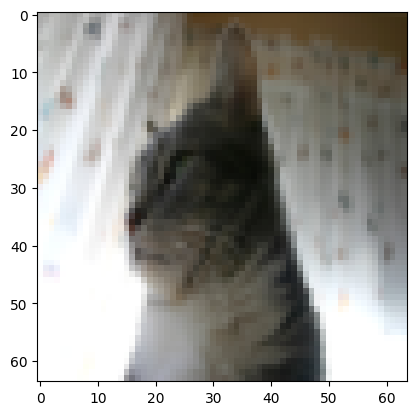

In [ ]:
plt.imshow(xtrain[0])
plt.show()

In [ ]:
np.shape(xtrain[0])

(64, 64, 3)

In [ ]:
np.reshape(xtrain[0], 64*64*3)

array([17, 31, 56, ...,  0,  0,  0], dtype=uint8)

In [ ]:
#Normalizando el dataset
xtrain_= np.reshape(xtrain,(209, 64*64*3))/255
xtest_ = np.reshape(xtest,(50, 64*64*3))/255

## Topología de la red.

1. Construir un clase  que permita definir una red neuronal con la topología
deseada y la función de activación para cada capa, para ello deberá construir una funcion Topology con el número de capas de la red neuronal :

Topology = [n_x, n_h1, n_h2, n_h3, ...,n_y]

En este caso:
- $n^{[0]}=n_x$ seran los valores de entradas de la capa de entrada
- $n^{[1]}=n_{h1}$ Primera capa oculta de la red neuronal
- $n^{[2]}=n_{h2}$ Segunda capa oculta de la red neuronal

.

.

.


- $n^{[l]}=n_{hl}$ Segunda capa oculta de la red neuronal
.

.

.

- $n^{[L]}=n_{y}$ Segunda capa oculta de la red neuronal

donde

- $\mathrm{n_x}$: valores de entrada
- $\mathrm{n_{h1}}$: hidden layer 1
- $\mathrm{n_{h2}}$: hidden layer 2
- $\mathrm{n_y}$: last layer

- $n^{[L]}=n_{y}$ Segunda capa oculta de la red neuronal


También definir una lista con las funciones de activaciones para cada capa.


activation=[None, relu, relu, relu, ...,sigmoid]

  


a. Cada unas de las capas deberá tener los parámetros de inicialización de manera aleatoria:


La matriz de parametros para cada capa debera tener:


$\mathrm{dim(\vec{b}^{[l]})}=n^{[l]}$

$\mathrm{dim(\vec{\Theta}^{[l]})}=n^{[l]}\times n^{[l-1]}$

Lo anteriores parametros deberán estar en el constructor de la clase.


b. Construya un metodo llamado output cuya salida serán los valores de Z y A


$\mathrm{dim(\vec{\cal{A}}^{[l]})}=n^{[l-1]}\times m $

$\mathrm{dim(\vec{\cal{Z}}^{[l]})}=n^{[l]}\times m $.


Se sugiere para cada capa emplear programación orientada a objetos definida de la siguiente manera:

```
class layer_nn():
  def __init__(self, act_fun, nlayer_present, nlayer_before):
    self.theta = 2*np.random.random((nlayer_present, nlayer_before)) - 1
    self.B = 2*np.random.random((nlayer_present,1)) - 1
    self.act_fun = act_fun

  def output(self, Z, A):
    self.Z = Z
    self.A = A



def act_function(x, activation):
  if activation=="sigmoid":
    f = lambda x: 1/(1+np.exp(-x))
    fp = f(x)*(1-f(x))
    return f, fp
  
  elif activation == "tanh":
    f = lambda x: np.tanh
    return tanh
  else :
    return 0
```
    

In [ ]:
m = 2*np.random.random((2, 2)) - 1

In [ ]:
sp.Matrix(m)

Matrix([
[-0.840175054699664, -0.131405015066934],
[-0.692383421815123, -0.470268299955726]])

In [ ]:
class layer_nn():
  def __init__(self, func_act, nn_present, nn_before):
    np.random.seed(0)
    self.theta = 2*np.random.random((nn_present, nn_before)) - 1
    self.b = 2*np.random.random((nn_present, 1))-1
    self.func_acti = func_act

  def output(self, A, Z):
    self.A = A
    self.Z = Z


def activation_function(name, x):
  if (name=="sigmoid"):
    f = lambda x: 1/(1+np.exp(-x))
    return f(x)

  elif (name=="tanh"):
    f =  lambda x: np.tanh(x)
    return f(x)
  else :
    return "Error"


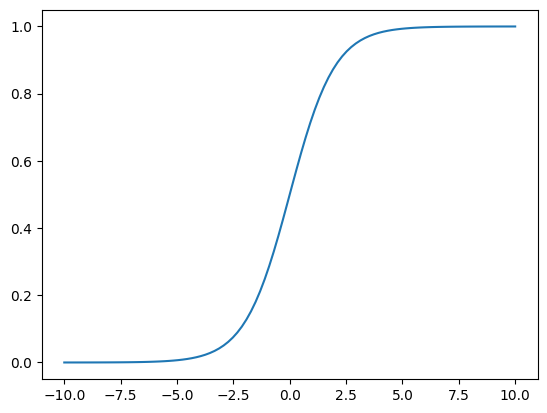

In [ ]:
x = np.linspace(-10,10,100)
plt.plot(x,activation_function('sigmoid',x))
plt.show()

In [ ]:
nx = 12288
Topology = [nx,3,4,7,1] #definir la topologia de la red

In [ ]:
#Crear las capas de activación de la red con la función de activación sigmoid
l1 = layer_nn("sigmoid",3, nx) #Capa 1
l2 = layer_nn("sigmoid", 4, 3) #Capa 2
l3 = layer_nn("sigmoid", 7, 4) #Capa 3
l4 = layer_nn("sigmoid",1, 7) #Capa 4


In [ ]:
#Incializacion de la arquitectura de la red
red_nn = [l1, l2, l3, l4]

In [ ]:
A0 = xtrain_.T
np.shape(l1.theta@A0)

(3, 209)

In [ ]:
np.shape(l1.b.repeat(209, axis = 1))

(3, 209)

In [ ]:
#Propagación de la red en las sucesivas capas

#Capa 1
Z1 = l1.theta@A0 + l1.b
A1 = activation_function(l1.func_acti, Z1)

#Capa2
Z2 = l2.theta@A1 + l2.b
A2 = activation_function(l2.func_acti, Z2)

#Capa3
Z3 = l3.theta@A2 + l3.b
A3 = activation_function(l3.func_acti, Z3)

#Capa 4
Z4 = l4.theta@A3 + l4.b
A4 = activation_function(l4.func_acti, Z4)

In [ ]:
np.shape(A4)

(1, 209)

In [ ]:
ref=A4[0].copy()

##Generalización


In [ ]:
class layer_nn():
  def __init__(self, func_act, nn_present, nn_before):
    np.random.seed(0)
    self.theta = 2*np.random.random((nn_present, nn_before)) - 1
    self.b = 2*np.random.random((nn_present, 1))-1
    self.func_acti = func_act

  def output(self, A, Ap, Z):
    self.A = A
    self.Z = Z
    self.Ap = Ap

  def derivative(self,dtheta, db ):
    self.dtheta = dtheta
    self.db = db


def activation_function(name, x):
  if (name=="sigmoid"):
    f = 1/(1+np.exp(-x))
    df = f * (1-f)
    return f, df

  elif (name=="relu"):
    return np.maximum(x, 0)

  elif (name=="tanh"):
    f =  lambda x: np.tanh(x)
    return f(x)
  else :
    return "Error"

def build_red(topology, act_func):
  L = len(topology)
  red_nn = [layer_nn(act_func, topology[i], topology[i-1]) for i in range(1, Nl)]
  return red_nn

def forward_pass(A0, nn):
  update_nn = []
  for layer in nn:
    print(np.shape(layer.theta))
    li = layer
    Zi = li.theta@A0 + li.b
    Aii, Ap = activation_function(li.func_acti, Zi)
    li.output(Aii, Ap,Zi)
    update_nn.append(li)
    A0 = Aii.copy()

  return Aii, update_nn

In [ ]:
#Para la topologia de la red
nx = 12288
Topology = [nx,3, 4, 7, 1 ]
act_func = ["sigmoid","sigmoid", "sigmoid", "sigmoid", "sigmoid"]

In [ ]:
nx = 12288
Topology = [nx,3, 4, 7, 1 ]
act_func = ["sigmoid","sigmoid", "sigmoid", "sigmoid", "sigmoid"]
nn = build_red(Topology, act_func)

In [ ]:
nx = 12288
Topology = [nx,3, 4, 7, 1 ]
act_func = ["sigmoid","sigmoid", "sigmoid", "sigmoid", "sigmoid"]
nn = build_red(Topology, act_func)
AL, update_nn = forward_pass(A0, nn)

(3, 12288)
(4, 3)
(7, 4)
(1, 7)


3. Encontrar la funcion de coste.


$$-\frac{1}{m} \sum\limits_{i = 1}^{m} (y^{(i)}\log\left(a^{[L] (i)}\right) + (1-y^{(i)})\log\left(1- a^{[L](i)}\right)) \tag{7}$$

In [ ]:
Y = np.array(train_label)

In [ ]:
def cost_func(Y, A):
  m = Y.shape[0]
  ji = - ( Y*np.log(A)-(1-Y)*np.log(1-A))
  cost = ji.sum()
  return cost/m

In [ ]:
J = cost_func(Y, AL)


4. Construir un codigo que permita realizar el BackwardPropagation


# Backward Propagation

Para una capa $l$ arbitraria tenemos que:

- \begin{equation}
d\Theta^{[l]} =  d{\cal Z}^{(i)[l]} Trans(A)^{(i)[l-1]} = dA^{(i)[l]} f'({\cal Z}^{(i)[l]} ) Trans(A)^{(i)[l-1]}
\end{equation}

- \begin{equation}
db^{[l]} =  d{\cal Z}^{(i)[L]}  = dA^{(i)[l]} f'({\cal Z}^{(i)[l]} )
\end{equation}
```
db_L =  m_*np.sum(dZ, axis=1, keepdims=True)
```
Los valores de dA pueden ser escritos como:
- \begin{equation}
dA^{(i)[l-1]} = \Theta^{l} \cdot dZ^{(i)[l]}
\end{equation}





$ dZ^{[l]} = dA^{[l]} * f'^{[l]} (Z^{[l]}) $
$ d\Theta^{[l]} = \frac{\partial \mathcal{J} }{\partial \Theta^{[l]}} = \frac{1}{m} dZ^{[l]} A^{[l-1] T} \tag{1}$
$ db^{[l]} = \frac{\partial \mathcal{J} }{\partial b^{[l]}} = \frac{1}{m} \sum_{i = 1}^{m} dZ^{[l](i)}\tag{2}$
$ dA^{[l-1]} = \frac{\partial \mathcal{L} }{\partial A^{[l-1]}} = \theta^{[l] T} dZ^{[l]} \tag{3}$


Para la capa L esima:

```
dAL = -(np.divide(Y, A) - np.divide(1 - Y, 1 - A))
```

# Aplicacion gradiente descendente

$$ \Theta^{[l]} = \Theta^{[l]} - \alpha \text{ } d\Theta^{[l]} \tag{16}$$
$$ b^{[l]} = b^{[l]} - \alpha \text{ } db^{[l]} \tag{17}$$

In [ ]:
m_= 1/209
dAL = -(np.divide(Y, AL) - np.divide(1 - Y, 1 - AL))
fp = update_nn[3].Ap
dZ = dAL*fp
dthetaL = dZ@update_nn[2].A.T
db_L =  m_*np.sum(dZ, axis=1, keepdims=True)

update_nn[3].dtheta=dthetaL
update_nn[3].db=db_L

In [ ]:
np.shape(update_nn[3].theta.T)

(7, 1)

In [ ]:
np.shape(dZ)

(1, 209)

In [ ]:
# Capa L-1
dAL_1 = np.dot(update_nn[3].theta.T, dZ)
fp = update_nn[2].Ap
dZ_1 = dAL_1*fp

dthetaL1 = m_*dZ_1@update_nn[1].Ap.T
db_L1 = dZ_1.mean()

update_nn[2].dtheta=dthetaL1
update_nn[2].db=db_L1

In [ ]:
# Capa L-1
dAL_1 = np.dot(update_nn[2].theta.T, dZ_1)
fp = update_nn[1].Ap
dZ_1 = dAL_1*fp

dtheta_L1 = m_*dZ_1@update_nn[0].Ap.T
db_L1 = dZ_1.mean()

update_nn[1].dtheta=dtheta_L1
update_nn[1].db=db_L1

##Generalización del Backward Propagation

In [ ]:
def backward_propagation(AL, Y, nn):
    m = Y.shape[1]

    # Capa de clasificación
    dAL = -np.divide(Y, AL) + np.divide(1 - Y, 1 - AL)
    fp = nn[-1].Ap
    dZ = dAL * fp

    dtheta = 1/m * dZ @ nn[-2].A.T
    db = 1/m * np.sum(dZ, axis=1, keepdims=True)

    nn[-1].derivative(dtheta, db)

    # Propagar hacia atrás
    for i in reversed(range(len(nn) - 1)):
        dA = nn[i + 1].theta.T @ dZ
        fp = nn[i].Ap
        dZ = dA * fp

        if i > 0:
            dtheta = 1/m * dZ @ nn[i - 1].A.T
        else:
            dtheta = 1/m * dZ @ nn[i].A.T

        db = 1/m * np.sum(dZ, axis=1, keepdims=True)
        nn[i].derivative(dtheta, db)

    return nn